<a href="https://colab.research.google.com/github/SahithyTumma/Activity-Change-Detection/blob/main/Activity_Change_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MINUTES OF MEET**


1. DATA PROCESSING  -    3 min
2. DATA VISUALIZATION / ANALYSIS - 3 min
3. OBSERVATIONS       -   1 min
4. A MACHINE LEARNIG MODEL -  2 min




1)    ***DATA PROCESSING***

***ACTIVITY CHANGE DETECTION DATASET DESCRIPTION***

---



***Reference***: https://github.com/vageeshh/Project_Session/blob/main/Machine_Learning/ML_Projects/HumanActivityRecognition/HumanActivityRecognition.ipynb

---

The data extracted is from 30 people, whose daily life movements are taken while carrying a waist-mounted smartphone with embedded inertial sensors.

Regular activities like **walking, walking upstairs, downwards, sitting, standing, laying are recorded**. 

There are 2 sensors embedded namely accelerometer and gyroscope for each person. The **accelerometer** sensor captures 3-axial (XYZ) **linear acceleration** at a constant rate of 50Hz whereas **gyroscope** captures  3-axial (XYZ) **angular velocity** at a constant rate of 50Hz. The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window) (digital data is being considered)

Total dataset is split into **training(70%)** (21 subjects) and **testing(30%)** (9 subjects).

***DATA ATTRIBUTES***

1. Triaxial acceleration from the accelerometer (total acceleration) estimates body acceleration.
2. Triaxial Angular velocity from the gyroscope estimates body rotational movements.
3. 561 feature vector with time and frequency domain variables along with activity labels associated  ((265(t)+289(f))-> accelerometer + (7)-> gyroscope + (2)-> labels).
4. Subjects no.2,4,9,10,12,13,18,20,24 are used for testing and remaining 21 are used for training.
5. Every aspect recorded is divided into X,Y,Z dimensions for both time and frequency domains.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os

In [ ]:
dfTrain = pd.read_csv('https://raw.githubusercontent.com/SahithyTumma/Activity-Change-Detection/main/train.csv')  ## dfTrain has dataset of training 
dfTest = pd.read_csv('https://raw.githubusercontent.com/SahithyTumma/Activity-Change-Detection/main/test.csv')    ## dfTest has dataset of testing 

In [ ]:
df = pd.concat([dfTrain,dfTest])    ## total dataset = train+test
df.reset_index(inplace=True)        ## make changes in the original data frame itself if True.
df.drop('index',inplace=True,axis = 1)  ## can drop rows or columns in original full data
df.info()   #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


2) ***DATA VISUALIZATION***

In [ ]:
#checking of rows and columns to the total data
print("Number of Data Points: ", df.shape[0])   ##total number of rows(total data collected for each feature)
print("Number of Features    : ", df.shape[1])  ## total number of features we took (561)+2 attributes.

Number of Data Points:  10299
Number of Features    :  563


In [ ]:
columnNames = list()
columnNames = df.columns
badChars = ['-', '()','(',')', ',']
newColumnNames = []
for colName in columnNames:
  newColumnName = ''.join(i for i in colName if i not in badChars)
  newColumnNames.append(newColumnName)
df.columns = newColumnNames

In [ ]:
df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


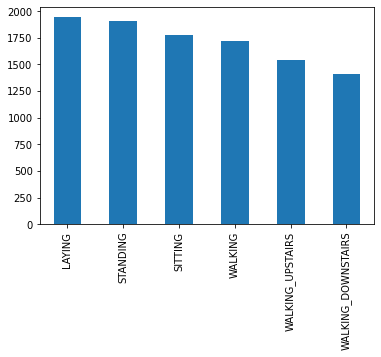

In [ ]:
df.Activity.value_counts().plot.bar()   ## total number of data points contributing for each activity

In [ ]:
%time
df.groupby('Activity').mean() ## mean of all datapoints for an activity for all features

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,0.268649,-0.018318,-0.107436,-0.960932,-0.943507,-0.948069,-0.963395,-0.944099,-0.947261,-0.911610,...,-0.342490,-0.658640,0.010366,0.016013,0.022788,0.009191,0.520261,-0.435944,-0.427749,16.643519
SITTING,0.273060,-0.012690,-0.105517,-0.983446,-0.934881,-0.938982,-0.985280,-0.934798,-0.936671,-0.926703,...,-0.384740,-0.686795,0.012034,0.002458,0.013413,-0.033260,-0.706042,0.006140,-0.089532,16.680360
STANDING,0.279153,-0.016152,-0.106587,-0.984435,-0.932509,-0.939914,-0.987205,-0.933875,-0.937739,-0.921265,...,-0.343769,-0.654989,0.006991,0.010397,0.004614,0.015957,-0.774143,0.209818,0.031743,16.513116
WALKING,0.276337,-0.017907,-0.108882,-0.314644,-0.023583,-0.273921,-0.352470,-0.055491,-0.274098,-0.113458,...,-0.071308,-0.400268,0.014918,-0.007011,0.011332,-0.019443,-0.761886,0.218599,0.059771,15.272938
WALKING_DOWNSTAIRS,0.288137,-0.016312,-0.105762,0.100766,0.059549,-0.190805,0.032426,0.003907,-0.214569,0.417152,...,-0.277020,-0.618394,-0.039692,-0.018665,0.203588,-0.076029,-0.780873,0.200189,0.055866,15.828592
WALKING_UPSTAIRS,0.262295,-0.025923,-0.120538,-0.237990,-0.016033,-0.175450,-0.297094,-0.030865,-0.172811,-0.015003,...,-0.361533,-0.682468,0.035371,0.006652,-0.129903,0.036432,-0.637980,0.278642,0.122794,15.716969


In [ ]:
%time
df.groupby('Activity').mean()['tBodyAccmeanX']

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 9.06 µs


Activity
LAYING                0.268649
SITTING               0.273060
STANDING              0.279153
WALKING               0.276337
WALKING_DOWNSTAIRS    0.288137
WALKING_UPSTAIRS      0.262295
Name: tBodyAccmeanX, dtype: float64

In [ ]:
print("Number of duplicates: ", df.duplicated().sum())  #check if there is any repition in values 

Number of duplicates:  0


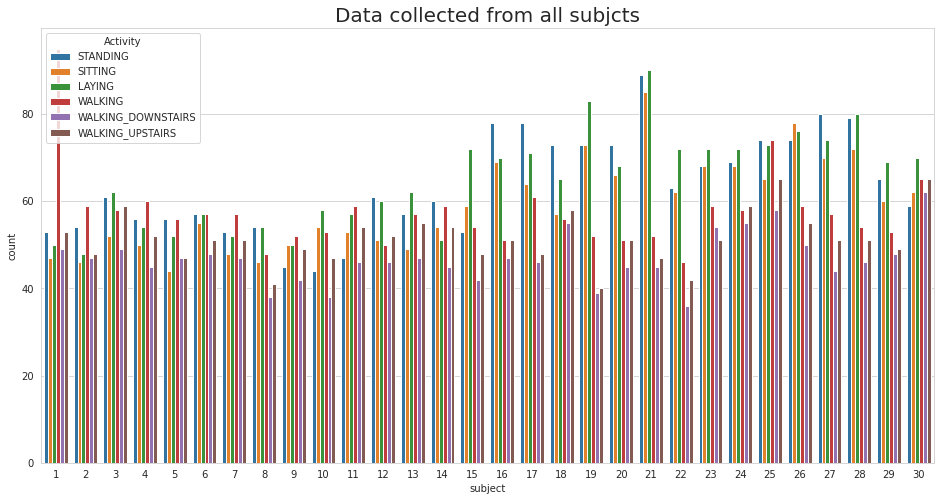

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Data collected from all subjcts', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)  ## count plot of activity hue
plt.show()

3) ***DATA ANALYSIS***

**Activities**

1. Non Moving: SITTING, STANDING, LAYING
2. Moving : WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS

Seeing the density of these activities for 2 features one in time domain and other in frequency domain for Accelerometer for MagMean.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

Text(0.0, 5, 'Moving Activities')

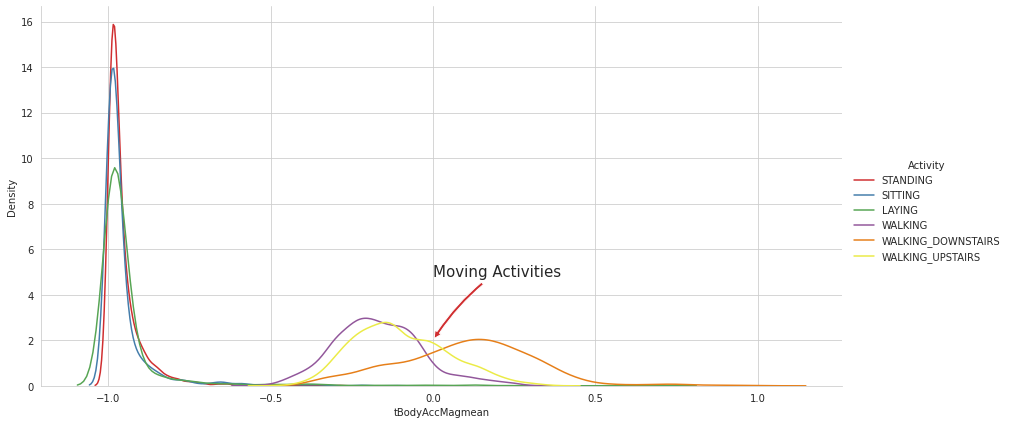

In [ ]:
facetgrid = sns.FacetGrid(df,hue='Activity',size = 6, aspect=2)   ##6 features in Activity column will be included in legends
facetgrid.map(sns.displot,'tBodyAccMagmean',hist = False).add_legend()   ##make distplot of tBodyAccMagmean
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))## point label of moving activities with an arrow in center

Seeing the same for fBodyAccMagMean 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

Text(0.0, 5, 'Moving Activities')

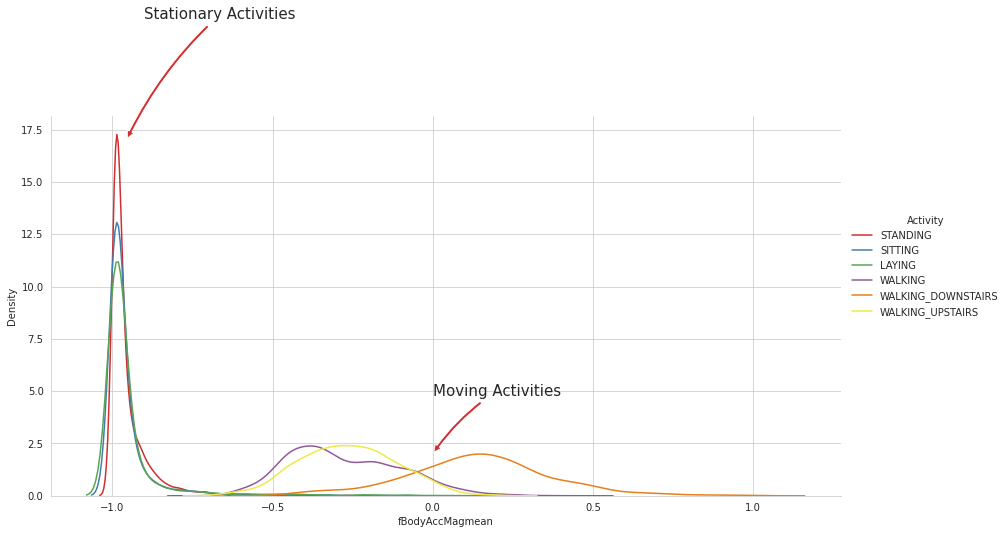

In [ ]:
facetgrid = sns.FacetGrid(df,hue='Activity',size = 6, aspect=2) ##6 features in Activity column will be included in legends
facetgrid.map(sns.distplot,'fBodyAccMagmean',hist = False).add_legend() ##make distplot of fBodyAccMagmean
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))  ## point label of stationary activities with an arrow in center
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1")) ## point label of moving activities with an arrow in center

Now let us see these density plots for other randomly picked features, here we took "tBodyAccJerkMagmean" and 